# Intro to Linear Regression
Linear regression is often the first model you learn in data science. We'll start with a simple model to predict mission success from distance.


### Import and Load Data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load data
df = pd.read_csv("/Users/amrithaa/Downloads/12DayDataSeries/notebooks/data/mission_data.csv")
df.head()

,mission_id,crew_size,mission_duration,distance_km,solar_flare_risk,fuel_capacity,oxygen_reserve,launch_day_temp,mental_health_score,comm_delay,anomaly_detected,mission_type,mission_success_score
0,MSN_0000,8,190,365.087064,0.320381,829.934114,130.730624,10.074432,0.818863,11.089683,0,resupply,19.190786
1,MSN_0001,5,236,378.075560,0.075308,847.907383,75.617616,19.173706,0.960807,9.208195,0,resupply,19.836566
2,MSN_0002,6,208,301.600207,0.416936,1099.062080,91.648318,12.940053,0.696440,10.722013,1,rescue,19.066117
3,MSN_0003,8,162,262.329106,0.287994,766.985429,100.489583,17.246547,0.888106,8.129583,0,exploration,20.467528
4,MSN_0004,4,153,322.998607,0.204623,761.868693,117.060716,6.307427,0.804730,9.530875,0,exploration,17.168499


### Visualize X vs Y

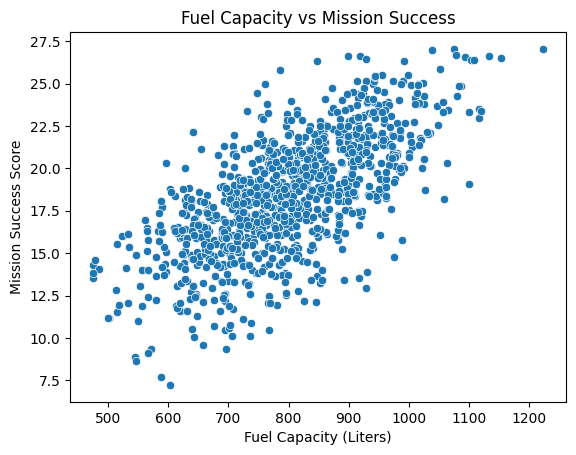

In [13]:
# Pick one feature and one target
X = df[["fuel_capacity"]] # input
y = df["mission_success_score"]  # output

# Plot
sns.scatterplot(x=df["fuel_capacity"], y=df["mission_success_score"])
plt.xlabel("Fuel Capacity (Liters)")
plt.ylabel("Mission Success Score")
plt.title("Fuel Capacity vs Mission Success")
plt.show()

### Fit a Linear Regression Model

In [14]:
# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Add predictions to df
df["predicted_success"] = y_pred

# Show coefficients
print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope: {model.coef_[0]:.2f}")


Intercept: 3.13
Slope: 0.02


### Plot Predictions vs Actual

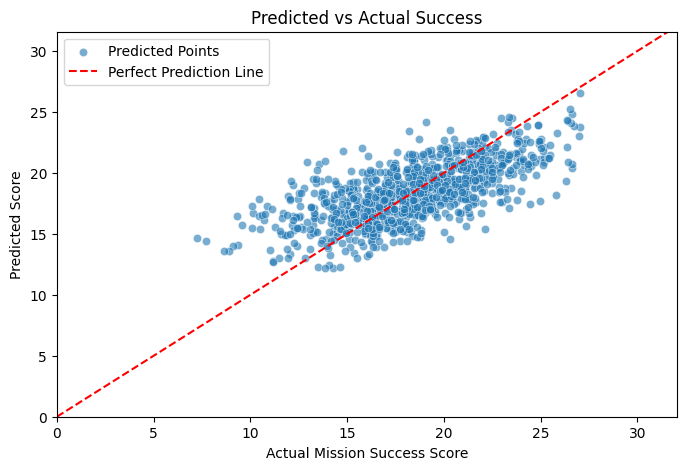

In [15]:
plt.figure(figsize=(8, 5))

# Plot the predicted points
sns.scatterplot(x=y, y=y_pred, alpha=0.6, label="Predicted Points")

# Plot the ideal line (perfect prediction)
plt.plot([0, 100], [0, 100], 'r--', label="Perfect Prediction Line")

# Axis labels and title
plt.xlabel("Actual Mission Success Score")
plt.ylabel("Predicted Score")
plt.title("Predicted vs Actual Success")

# Axis limits
plt.xlim(0, y.max() + 5)
plt.ylim(0, y_pred.max() + 5)

# Show legend
plt.legend()

plt.show()


### Evaluate the Linear Regression Model

In [22]:
# Error Metrics
residuals = y - y_pred
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"Lin Reg Mean Squared Error (MSE): {mse:.2f}")
print(f"Lin Reg Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Lin Reg R² Score: {r2:.2f}")

Lin Reg Mean Squared Error (MSE): 6.45
Lin Reg Root Mean Squared Error (RMSE): 2.54
Lin Reg R² Score: 0.46


### Alternatively, Fit a k-Nearest Neighbors Regression Model

In [17]:
from sklearn.neighbors import KNeighborsRegressor

# Create and fit the model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X, y)

# Predict
y_pred_knn = knn_model.predict(X)

# Add predictions to df
df["knn_predicted_success"] = y_pred_knn

### Plot kNN Predictions vs Actual

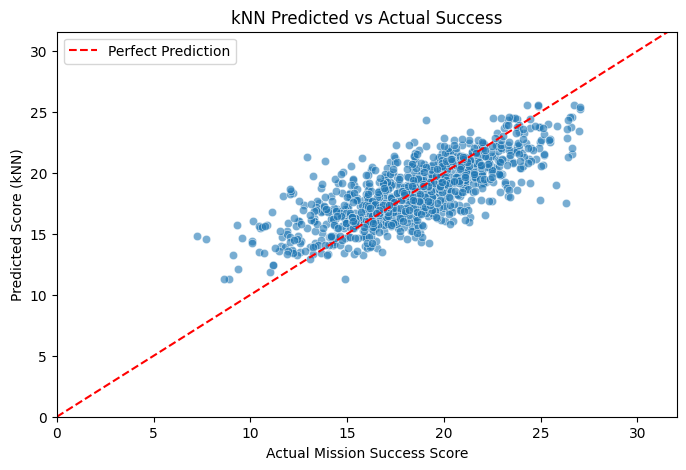

In [19]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y, y=y_pred_knn, alpha=0.6)
plt.xlabel("Actual Mission Success Score")
plt.ylabel("Predicted Score (kNN)")
plt.title("kNN Predicted vs Actual Success")
plt.plot([0, 100], [0, 100], 'r--', label="Perfect Prediction")

# Axis limits
plt.xlim(0, y.max() + 5)
plt.ylim(0, y_pred.max() + 5)

# Show legend
plt.legend()

plt.show()

### Evaluate the kNN Model

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Error Metrics for kNN
residuals_knn = y - y_pred_knn
mse_knn = mean_squared_error(y, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y, y_pred_knn)

print(f"kNN Mean Squared Error (MSE): {mse_knn:.2f}")
print(f"kNN Root Mean Squared Error (RMSE): {rmse_knn:.2f}")
print(f"kNN R² Score: {r2_knn:.2f}")


kNN Mean Squared Error (MSE): 5.02
kNN Root Mean Squared Error (RMSE): 2.24
kNN R² Score: 0.58


### Visualize Linear Regression and kNN models

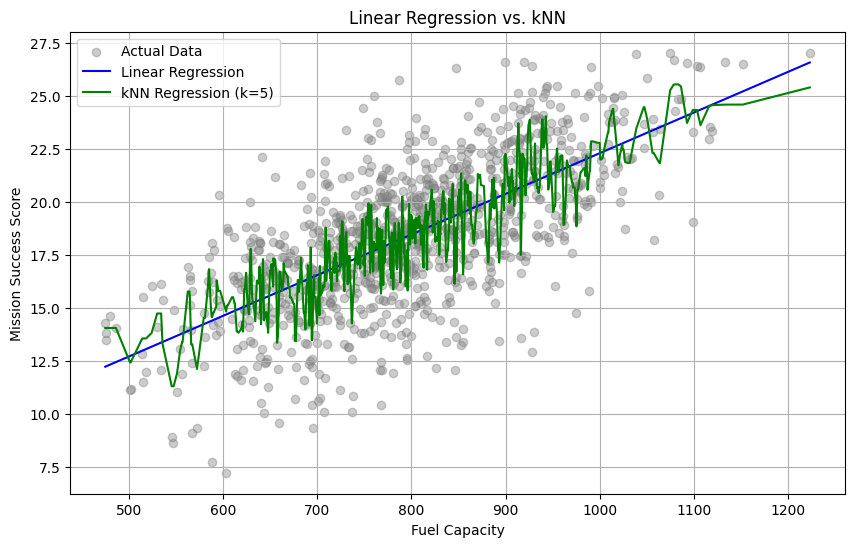

In [24]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', alpha=0.4, label="Actual Data")

# Sort for smooth line plotting
sorted_indices = X["fuel_capacity"].argsort()
plt.plot(X["fuel_capacity"].iloc[sorted_indices], 
         y_pred_lin[sorted_indices], 
         color='blue', label='Linear Regression')

plt.plot(X["fuel_capacity"].iloc[sorted_indices], 
         y_pred_knn[sorted_indices], 
         color='green', label='kNN Regression (k=5)')

plt.xlabel("Fuel Capacity")
plt.ylabel("Mission Success Score")
plt.title("Linear Regression vs. kNN")
plt.legend()
plt.grid(True)
plt.show()

### What this tells us:

We started with a *very simple model*, using only one feature, `fuel_capacity` to predict mission success.

- 📉 **Linear Regression** gave us an R² of **0.46**, suggesting that while **there’s some signal**, it’s limited. Fuel capacity alone doesn’t capture the full complexity of what makes a mission successful.
- 📈 **kNN Regression** did better, with an R² of **0.58** and lower error overall. Why? kNN is non-linear and more flexible, allowing it to adapt to patterns that straight-line models might miss.

Still, both models only look at one feature.

So while fuel capacity might play a role, it’s clearly not the full story. Real-world outcomes are shaped by multiple variables: distance, crew health, anomalies, and more.

---

### Takeaway:
Linear regression is a solid baseline, and kNN shows us what flexibility can achieve. But to truly model mission outcomes, we need to go **beyond single variables**.

**That’s where we’re headed next.** 🚀